In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
import numpy as np
import statistics as stat

In [2]:
pd.set_option('precision', 4)

fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.0000,159.0000,159.0000,159.0000,159.0000,159.0000
mean,398.3264,26.2472,28.4157,31.2270,8.9710,4.4175
std,357.9783,9.9964,10.7163,11.6102,4.2862,1.6858
min,0.0000,7.5000,8.4000,8.8000,1.7284,1.0476
25%,120.0000,19.0500,21.0000,23.1500,5.9448,3.3857
50%,273.0000,25.2000,27.3000,29.4000,7.7860,4.2485
75%,650.0000,32.7000,35.5000,39.6500,12.3659,5.5845
max,1650.0000,59.0000,63.4000,68.0000,18.9570,8.1420


In [6]:
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [8]:
fish.shape

(159, 7)

In [10]:
df1 = fish.copy()
df2 = fish.copy()

In [11]:
df2.pop('Weight').values
df2.pop('Species').values

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [12]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = 32.79, Constant = -462.38


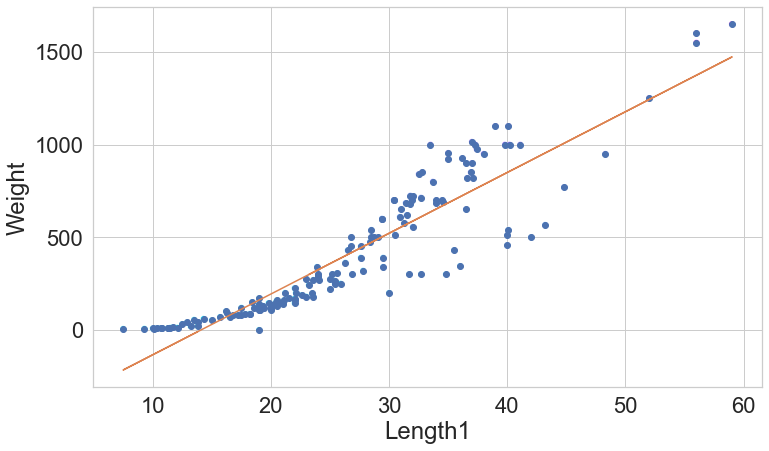

linear regression line: Slope = 30.69, Constant = -473.65


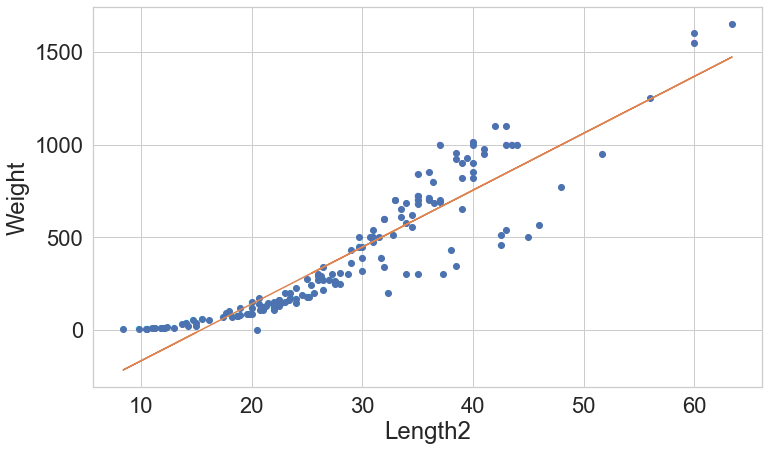

linear regression line: Slope = 28.46, Constant = -490.40


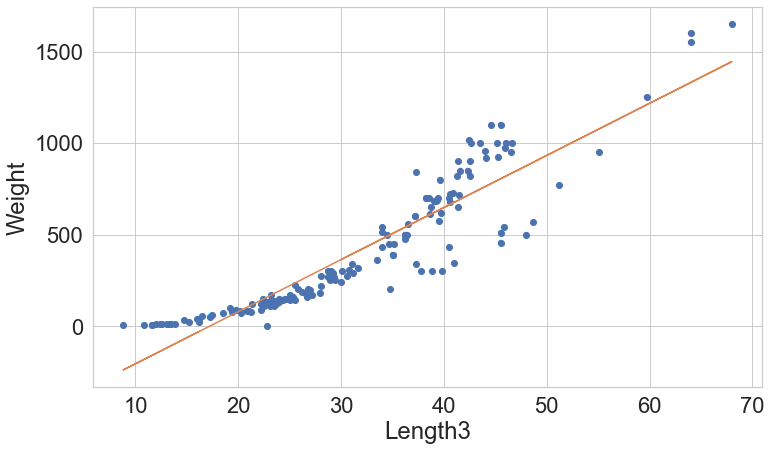

linear regression line: Slope = 60.50, Constant = -144.39


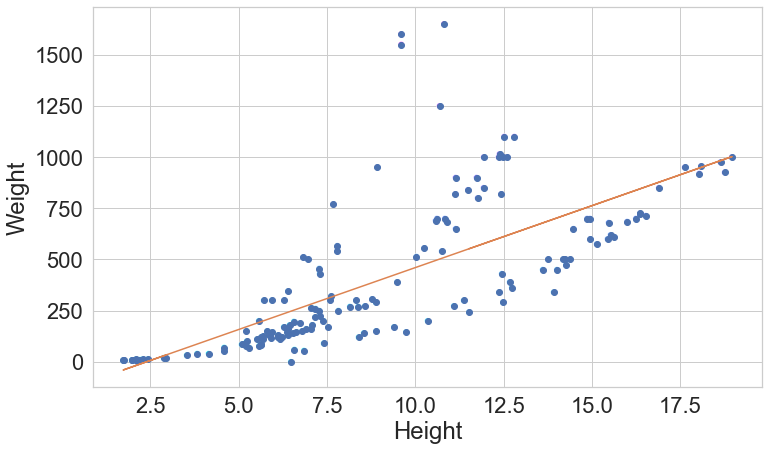

linear regression line: Slope = 188.25, Constant = -433.26


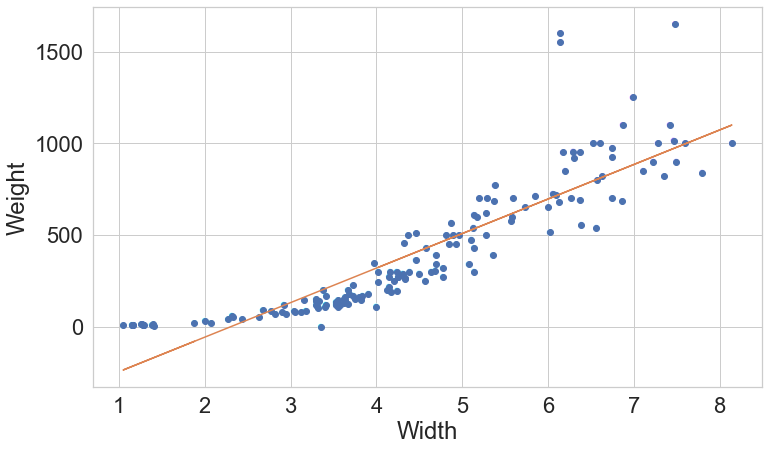

In [13]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='Weight',hue='Weight',palette='cool', legend=False)
    regression_line(df2[i], df1['Weight'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['Weight'], random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (119, 5)
Shape of testing  set = (40, 5)


In [15]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(df2.columns):
    print(f'{name:}: {linear_regression.coef_[i]:20.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

Length1: 26.39764922032609817393
Length2: 27.73616172810070423793
Length3: -25.32105553329940761387
Height: 26.31946175841585500166
Width: 5.05981271242811203592

y-intercept: -554.91225107179525366519


In [16]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.8
     correlation coefficient = 0.9


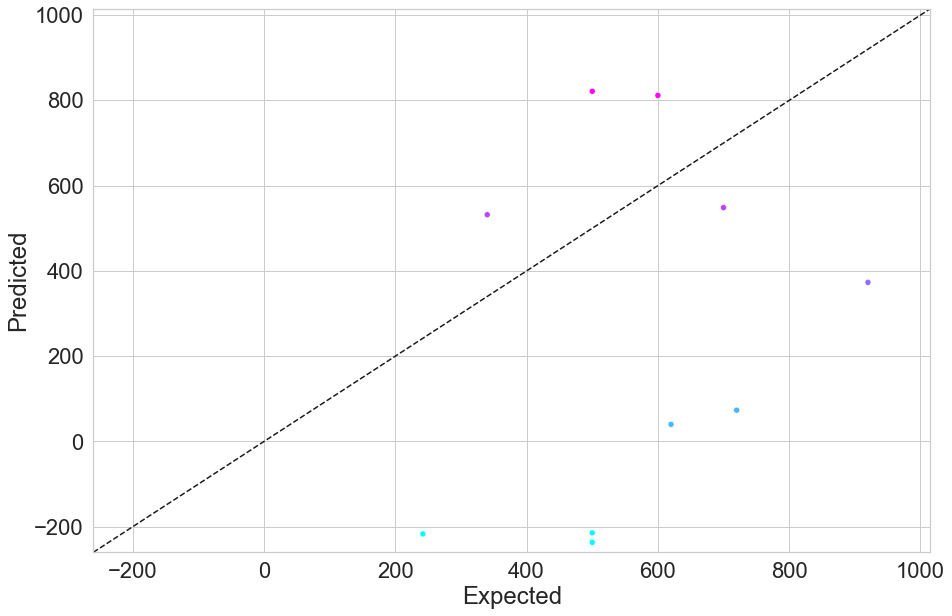

In [17]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')